In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt  #😊
import numpy as np




In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.__version__

'2.15.0'

In [5]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

Loading the Dataset

Our dataset contains 60000 small training images that belongs to one of the below 10 classes


In [12]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [10]:
y_train.shape

(10000, 32, 32, 3)

In [13]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [14]:
x_test.shape


(10000, 32, 32, 3)

In [15]:
y_test.shape

(10000, 1)

Data visualization

In [19]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

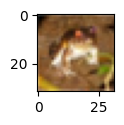

In [20]:
plot_sample(0)

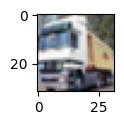

In [21]:
plot_sample(1)

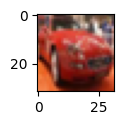

In [22]:
plot_sample(5)

In [23]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [40]:
classes[y_train[3][0]]

'deer'

Preprocessing

In [37]:
x_train_scaled=x_train/255
y_train_scaled=y_train/255

In [38]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

If you want to change above ouput to categorial like 0's and 1's use this

In [42]:
y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical=keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [43]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Model building and Training

In [52]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)), #layer for Flattening
        keras.layers.Dense(3000, activation='relu'), # Hidden layer
        keras.layers.Dense(1000, activation='relu'), #Hidden layer
        keras.layers.Dense(10, activation='sigmoid')   #Original layer ..here we are giving output shape as 10 because output can only be in 0 to 9 ...check datasets  
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy', # here why this loss? becuz y_train is categorical value like 0 and 1 ..if you wnat to use sparse categiorical loss you y_train should be dicrete value.
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8143 - accuracy: 0.3534
Epoch 2/3
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6238 - accuracy: 0.4280
Epoch 3/3
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5397 - accuracy: 0.4583
